## Q2) Sheep Question Continued

In [5]:
sheep <- read.csv('sheepdata.txt', header = FALSE)
colnames(sheep) <- c('Pop')

sheep.ts <- ts(sheep, start = 1867, frequency = 1)

sheep.lag.1.ts <- diff(sheep.ts, lag=1)

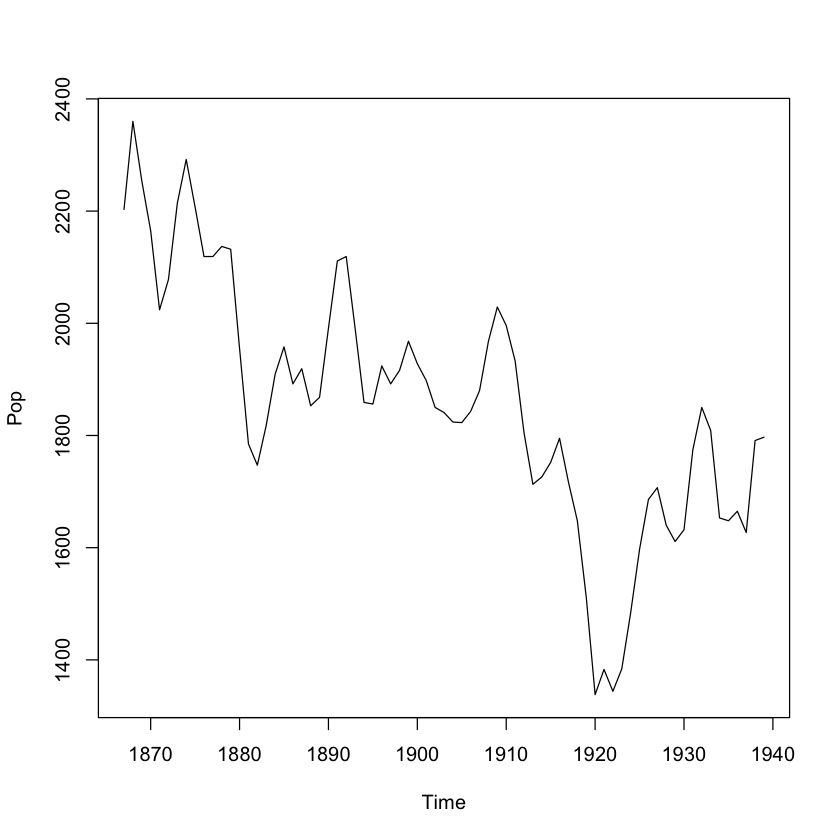

In [6]:
plot(sheep.ts)

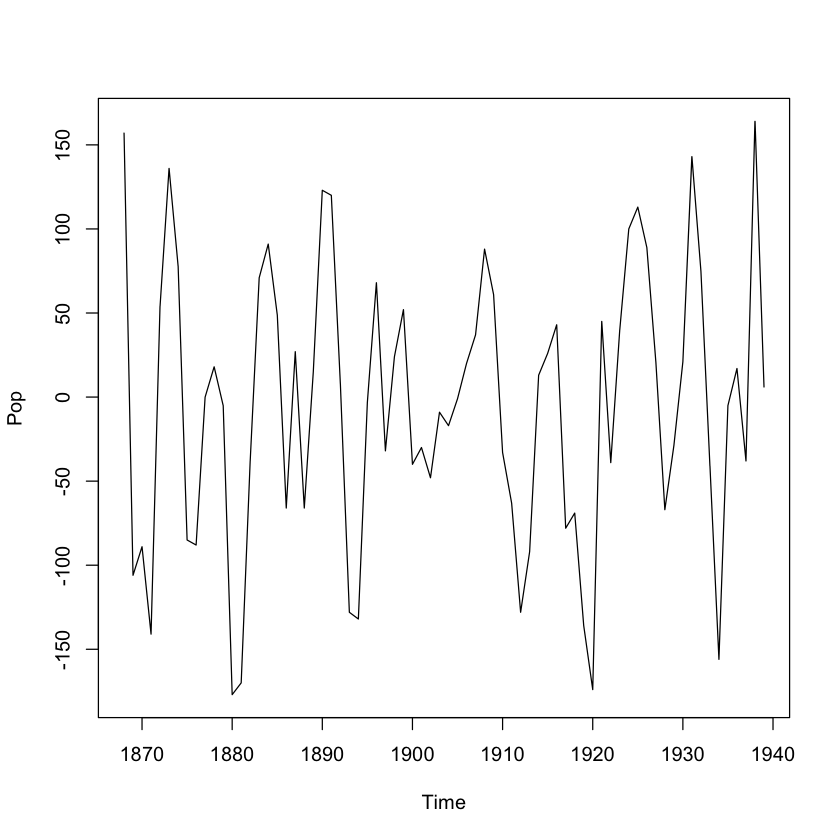

In [7]:
plot(sheep.lag.1.ts)

## 1) Is it stationary or not?

* Have looked at sample ACFs for both the process and the log of the process, and it looks like there's a linear decrease in the ACF that suggests the process is non-stationary

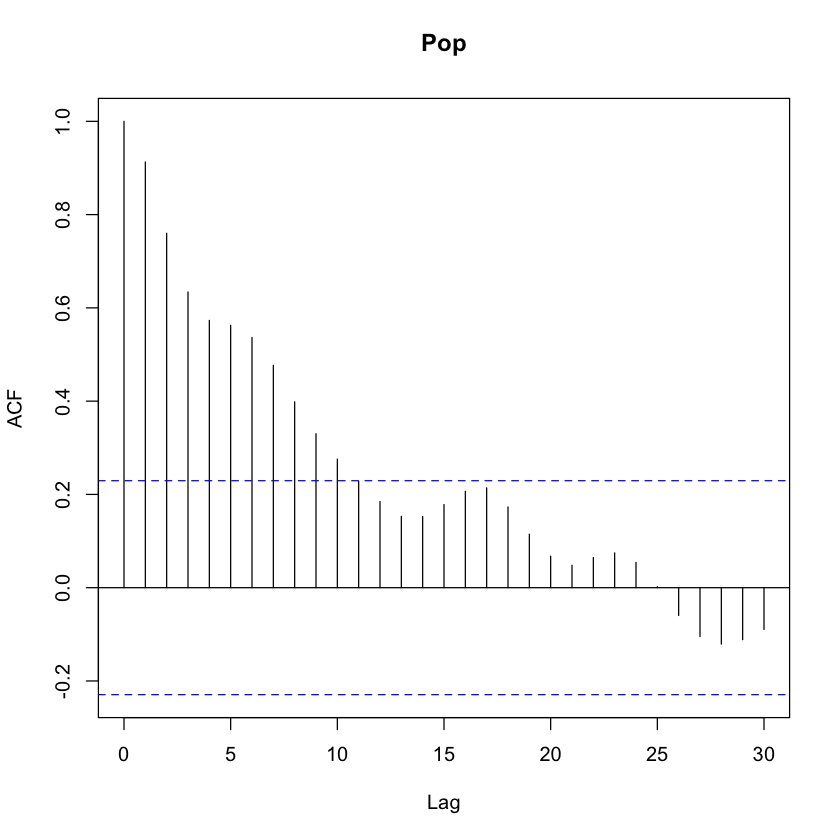

In [8]:
acf(sheep.ts, lag = 30)

## Not a stationary process.

## Must apply differencing to transform into a stationary process.

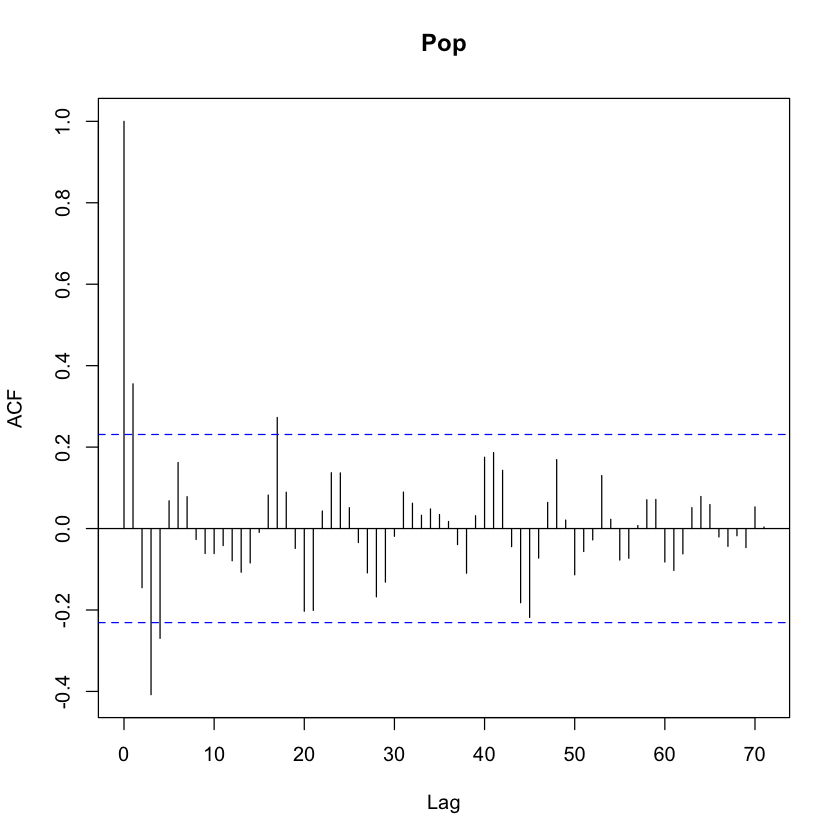

In [9]:
acf(sheep.lag.1.ts, lag=100)

## Strongly suggests an ARIMA model

> ACF shows geometric progression, so unlikely to be MA

> Shows values above the 95% confidence interval for a white noise process

> So the differenced process is either AR(p) or ARMA(p,q)

> Suspect it's AR(3), which means it's ARIMA(3,1,0)

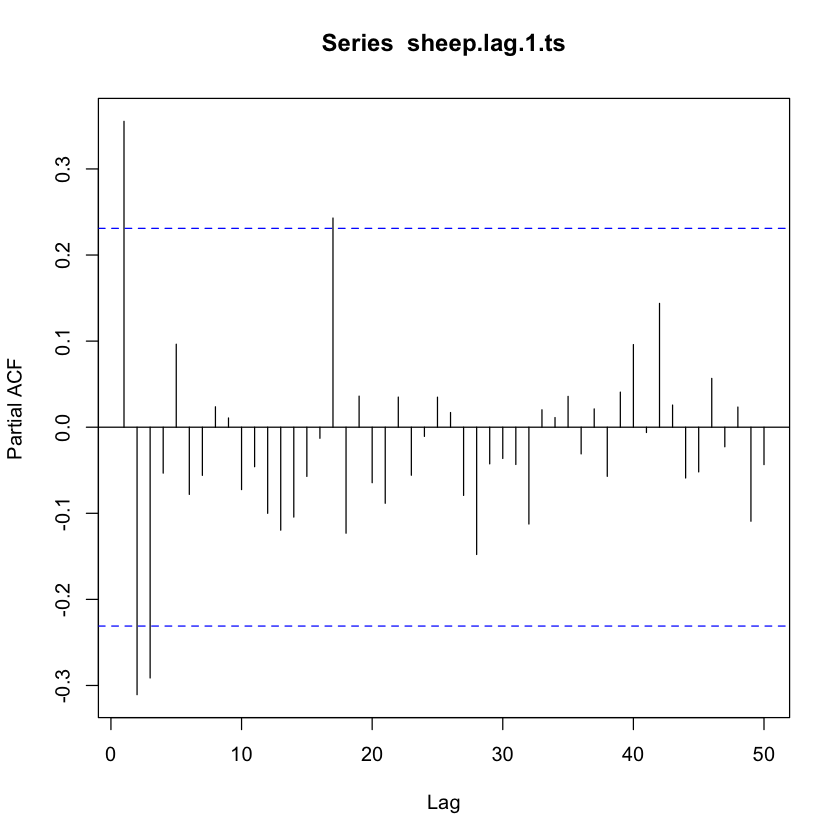

In [10]:
pacf(sheep.lag.1.ts, lag=50)

# Fitting ARIMA models

In [11]:
sheep.3.1.0 <- arima(sheep.ts, order=c(3,1,0))
sheep.3.1.0


Call:
arima(x = sheep.ts, order = c(3, 1, 0))

Coefficients:
         ar1      ar2      ar3
      0.4210  -0.2018  -0.3044
s.e.  0.1193   0.1363   0.1243

sigma^2 estimated as 4783:  log likelihood = -407.56,  aic = 823.12

In [12]:
sheep.3.1.1 <- arima(sheep.ts, order=c(3,1,1))
sheep.3.1.1


Call:
arima(x = sheep.ts, order = c(3, 1, 1))

Coefficients:
         ar1      ar2      ar3      ma1
      0.4927  -0.2411  -0.2770  -0.0766
s.e.  0.3128   0.2141   0.1724   0.3055

sigma^2 estimated as 4779:  log likelihood = -407.53,  aic = 825.05

In [13]:
sheep.4.1.0 <- arima(sheep.ts, order=c(4,1,0))
sheep.4.1.0


Call:
arima(x = sheep.ts, order = c(4, 1, 0))

Coefficients:
         ar1      ar2      ar3      ar4
      0.4117  -0.2176  -0.2779  -0.0481
s.e.  0.1219   0.1433   0.1441   0.1323

sigma^2 estimated as 4774:  log likelihood = -407.49,  aic = 824.98

In [14]:
sheep.4.1.1 <- arima(sheep.ts, order=c(4,1,1))
sheep.4.1.1


Call:
arima(x = sheep.ts, order = c(4, 1, 1))

Coefficients:
          ar1     ar2      ar3      ar4     ma1
      -0.5117  0.1725  -0.4578  -0.3496  0.9448
s.e.   0.1905  0.1574   0.1389   0.1240  0.1602

sigma^2 estimated as 4621:  log likelihood = -406.51,  aic = 825.03

##  Firstly let's take a look at some diagnostics for the four potential models:

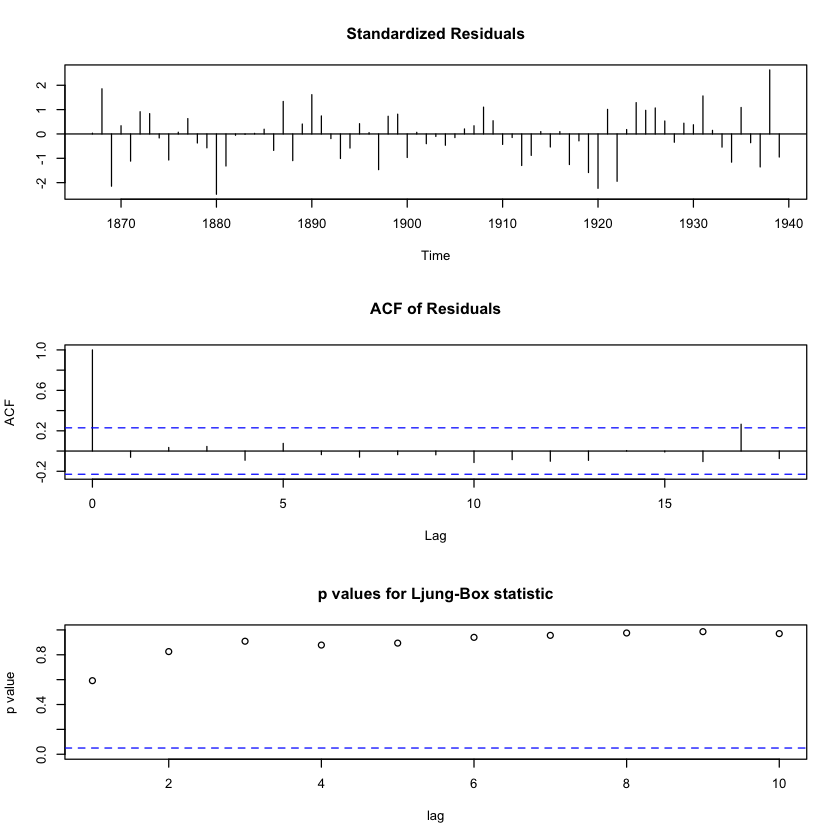

In [15]:
tsdiag(sheep.3.1.0)

# Summary:

* All four models pass the plot adequecy tests.
* Lowest AIC is ARIMA(3,1,0)
* Will look at the significance of the 4th parameter in ARIMA(4,1,0) to see if significantly differs from 0 in an overfitting test.

## Looking at ARIMA(4,1,0)

In [16]:
sheep.4.1.0


Call:
arima(x = sheep.ts, order = c(4, 1, 0))

Coefficients:
         ar1      ar2      ar3      ar4
      0.4117  -0.2176  -0.2779  -0.0481
s.e.  0.1219   0.1433   0.1441   0.1323

sigma^2 estimated as 4774:  log likelihood = -407.49,  aic = 824.98

In [17]:
t <- -0.0481 / 0.1323

In [18]:
t

[1] -0.3635676

In [19]:
T <- length(sheep.ts)
T

[1] 73

In [20]:
# degrees of freedom:
## T - 4 (parameters)
## - 1 (differencing so really our modified T = T-1)
## - 1 (mean) - 1 (extra)
df <-  T - 4 - 1 - 1 - 1
df

[1] 66

In [21]:
2*pt(t, df, lower.tail=TRUE)

[1] 0.7173429

**Cannot reject  the  null hypothesis that the fourth AR parameter is equal to zero, thus we accept the alternative that $\phi_{4} = 0$**

## Model equation and fitted equation:

#### ARIMA(3,1,0)

> $W_{t} = (1-L)Y_{t}$

#### ARMA(3,0) for $\{W_{t}\}$

> $\phi(L)(W_{t} - \mu) = \theta(L)\epsilon_{t}$

#### For ARMA(3,0):

> $\theta(L) = 1$

> $\phi(L) = 1 - \phi_{1}L - \phi_{2}L^{2} - \phi_{3}L^{3}$

#### Full ARMA(3,0):

> $(1 - \phi_{1}L - \phi_{2}L^{2} - \phi_{3}L^{3})(1-L)Y_{t} = \epsilon_{t}$

> $Y_{t} = (1+\phi_{1})Y_{t-1} - (\phi_{1} - \phi_{2})Y_{t-2} - (\phi_{2} - \phi_{3})Y_{t-3} - \phi_{3}Y_{t-4} + \epsilon_{t}$

# Forecasting ARIMA(3,1,0)

In [26]:
sheep.3.1.0


Call:
arima(x = sheep.ts, order = c(3, 1, 0))

Coefficients:
         ar1      ar2      ar3
      0.4210  -0.2018  -0.3044
s.e.  0.1193   0.1363   0.1243

sigma^2 estimated as 4783:  log likelihood = -407.56,  aic = 823.12

In [27]:
sheep.fore <- predict(sheep.3.1.0, 5)

print(sheep.fore)

$pred
Time Series:
Start = 1940 
End = 1944 
Frequency = 1 
[1] 1777.996 1718.869 1695.985 1704.067 1730.084

$se
Time Series:
Start = 1940 
End = 1944 
Frequency = 1 
[1]  69.16201 120.17563 154.17498 168.88593 175.79008



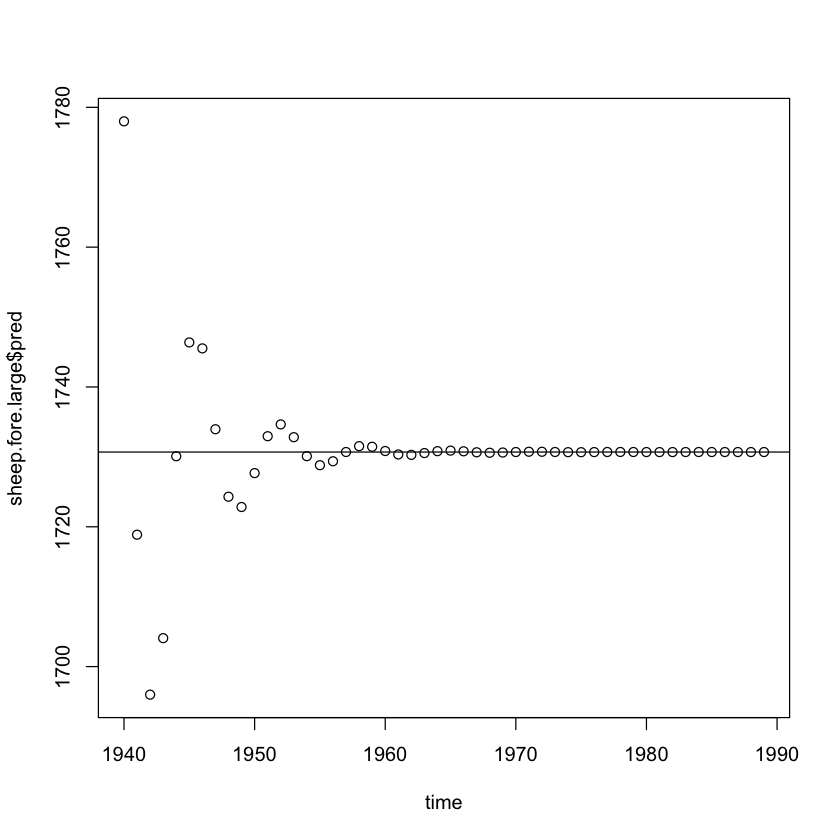

In [64]:
h <- 50

sheep.fore.large <- predict(sheep.3.1.0, h)

time <- 1940:(1940+h-1)

plot(time, sheep.fore.large$pred)
abline(h=1730.690)

In [63]:
print(sheep.fore.large$pred)

Time Series:
Start = 1940 
End = 1989 
Frequency = 1 
 [1] 1777.996 1718.869 1695.985 1704.067 1730.084 1746.371 1745.518 1733.953
 [9] 1724.299 1722.829 1727.678 1732.954 1734.644 1732.815 1730.098 1728.809
[17] 1729.371 1730.695 1731.531 1731.445 1730.837 1730.344 1730.286 1730.545
[25] 1730.817 1730.896 1730.796 1730.655 1730.592 1730.624 1730.693 1730.735
[33] 1730.729 1730.697 1730.672 1730.670 1730.684 1730.698 1730.701 1730.696
[41] 1730.689 1730.685 1730.687 1730.691 1730.693 1730.693 1730.691 1730.690
[49] 1730.690 1730.690
